# 🌸 k-Nearest Neighbors (k-NN) Classification on the Iris Dataset

## 📚 Introduction to k-NN

The **k-Nearest Neighbors (k-NN)** algorithm is a simple, yet powerful supervised machine learning method used for classification and regression tasks. It is a **non-parametric, instance-based learning** algorithm, meaning it makes predictions based on the closest training examples in the feature space — it doesn't explicitly learn a model during training.

---

## 📊 About the Iris Dataset

The **Iris dataset** is one of the most well-known datasets in pattern recognition. It contains **150 samples** from three species of Iris flowers:
- *Iris-setosa*
- *Iris-versicolor*
- *Iris-virginica*

Each sample has **4 features**:
- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)

The task is to classify the species of the iris plant based on these features.

---

## ⚙️ How k-NN Works

1. **Choose the number of neighbors** `k`.
2. For a new input instance:
   - Calculate the **distance** (typically Euclidean) to all training points.
   - **Select the k nearest** training points.
   - **Majority vote** (for classification): the most common class among the k neighbors becomes the predicted class.

🔁 The value of `k` plays a crucial role:
- A **low k** (e.g., k=1) can lead to overfitting.
- A **high k** might oversmooth the decision boundary and underfit.

---


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

So there is no missing values :)

In [5]:
set(df['Species'])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [6]:
df1 = df.copy()

In [7]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
encoded = le.fit_transform(df1['Species'])
df1['Species']=encoded

In [8]:
for c,v in enumerate(le.classes_):
    print(f"{c}-->{v}")

0-->Iris-setosa
1-->Iris-versicolor
2-->Iris-virginica


In [9]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
df1.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
df1.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [12]:
from sklearn.preprocessing import MinMaxScaler
# Define columns to scale
cols_to_scale = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform only the selected columns
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

# View the scaled dataframe
print(df1.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1       0.222222      0.625000       0.067797      0.041667        0
1   2       0.166667      0.416667       0.067797      0.041667        0
2   3       0.111111      0.500000       0.050847      0.041667        0
3   4       0.083333      0.458333       0.084746      0.041667        0
4   5       0.194444      0.666667       0.067797      0.041667        0


In [13]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,0
1,2,0.166667,0.416667,0.067797,0.041667,0
2,3,0.111111,0.500000,0.050847,0.041667,0
3,4,0.083333,0.458333,0.084746,0.041667,0
4,5,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...,...
145,146,0.666667,0.416667,0.711864,0.916667,2
146,147,0.555556,0.208333,0.677966,0.750000,2
147,148,0.611111,0.416667,0.711864,0.791667,2
148,149,0.527778,0.583333,0.745763,0.916667,2


In [14]:
df1.drop('Id',axis=1,inplace=True)

## BaseLine Model

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [16]:
from sklearn.model_selection import train_test_split
X = df1.drop('Species',axis=1)
y = df1['Species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [17]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [18]:
X_train.shape , y_train.shape

((120, 4), (120,))

In [19]:
X_test.shape,y_test.shape

((30, 4), (30,))

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
knn.score(X_test,y_test)

1.0

## Finding out value of K

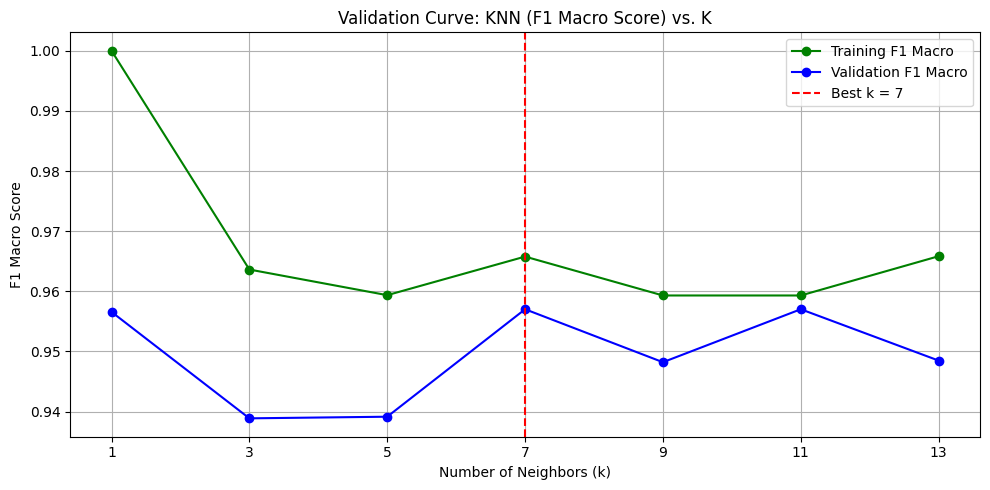

In [22]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define range of k values
k_val = range(1, 15, 2)

# Compute validation curve
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X_train,
    y_train,
    param_name='n_neighbors',
    param_range=k_val,
    scoring='f1_macro',
    cv=5
)

# Calculate mean scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
best_k = k_val[np.argmax(test_mean)]
best_score = max(test_mean)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(k_val, train_mean, marker='o', label='Training F1 Macro', color='green')
plt.plot(k_val, test_mean, marker='o', label='Validation F1 Macro', color='blue')
plt.axvline(x=best_k, linestyle='--', color='red', label=f'Best k = {best_k}')
plt.title("Validation Curve: KNN (F1 Macro Score) vs. K")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("F1 Macro Score")  
plt.legend()
plt.grid(True)
plt.xticks(k_val)
plt.tight_layout()
plt.show()


We have best k = 7

In [23]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [24]:
knn_best.score(X_test,y_test)

1.0

## Evaluation

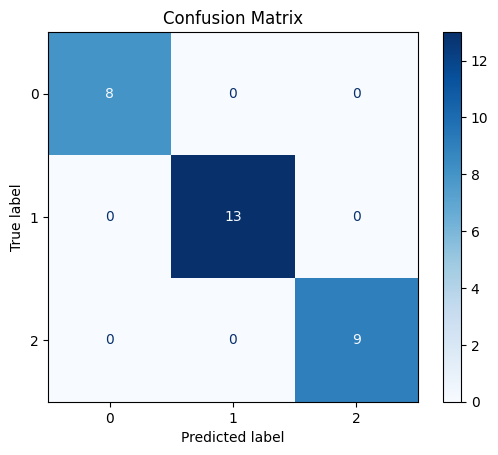

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
# ----------- 📊 Confusion Matrix -----------
ConfusionMatrixDisplay.from_estimator(knn_best, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [26]:
# ----------- 🧾 Classification Report -----------
y_pred = knn_best.predict(X_test)
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_ if 'le' in globals() else None))

📋 Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [27]:
# ----------- 🔁 Cross-Validation Scores -----------
print("🔁 Cross-Validation Scores (5-fold):\n")

for metric in ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']:
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=best_k), X, y, cv=5, scoring=metric)
    print(f"{metric.capitalize():<18}: {scores.mean():.4f} ± {scores.std():.4f}")

🔁 Cross-Validation Scores (5-fold):

Accuracy          : 0.9600 ± 0.0327
Precision_macro   : 0.9623 ± 0.0322
Recall_macro      : 0.9600 ± 0.0327
F1_macro          : 0.9599 ± 0.0327


## Visualizing Decision Boundary

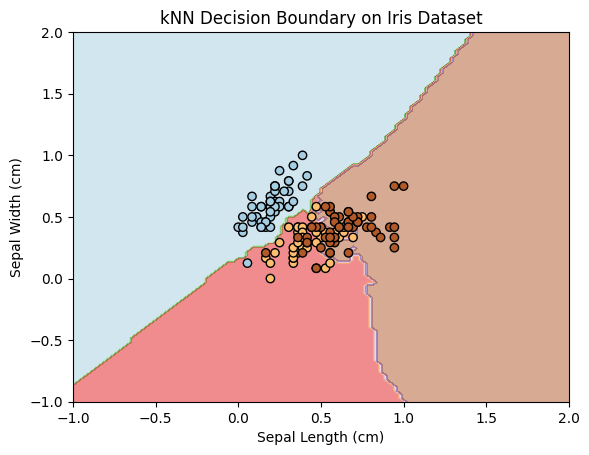

In [28]:
from sklearn.inspection import DecisionBoundaryDisplay
# Plot decision boundary using sklearn's DecisionBoundaryDisplay
Z = X[['SepalLengthCm', 'SepalWidthCm']].values

# Train kNN classifier
knn_viz = KNeighborsClassifier(n_neighbors=best_k)
knn_viz.fit(Z, y)
disp = DecisionBoundaryDisplay.from_estimator(
    knn_viz, Z, response_method='predict', cmap=plt.cm.Paired, alpha=0.5
)

# Overlay data points
plt.scatter(Z[:, 0], Z[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('kNN Decision Boundary on Iris Dataset')
plt.show()

<Axes: >

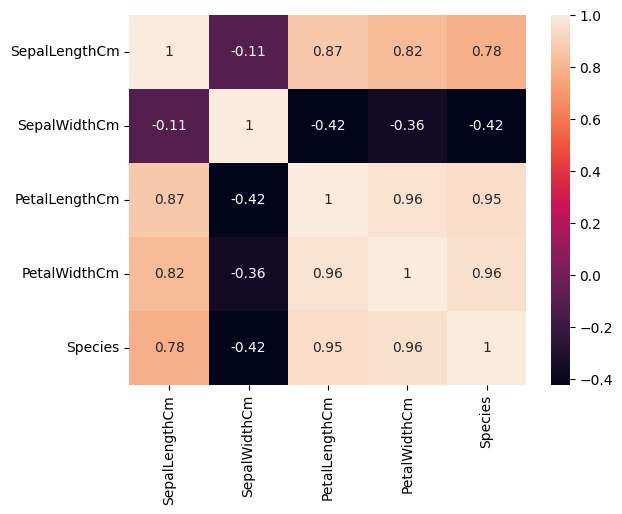

In [29]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True)

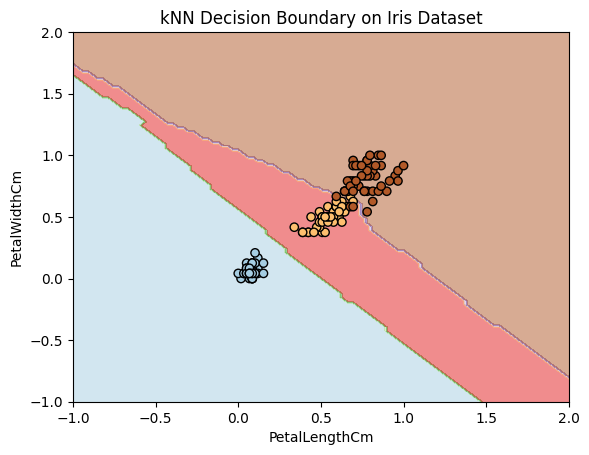

In [30]:
from sklearn.inspection import DecisionBoundaryDisplay
# Plot decision boundary using sklearn's DecisionBoundaryDisplay
Z = X[['PetalLengthCm', 'PetalWidthCm']].values

# Train kNN classifier
knn_viz = KNeighborsClassifier(n_neighbors=best_k)
knn_viz.fit(Z, y)
disp = DecisionBoundaryDisplay.from_estimator(
    knn_viz, Z, response_method='predict', cmap=plt.cm.Paired, alpha=0.5
)

# Overlay data points
plt.scatter(Z[:, 0], Z[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('kNN Decision Boundary on Iris Dataset')
plt.savefig('decisionboundary1.png')
plt.show()

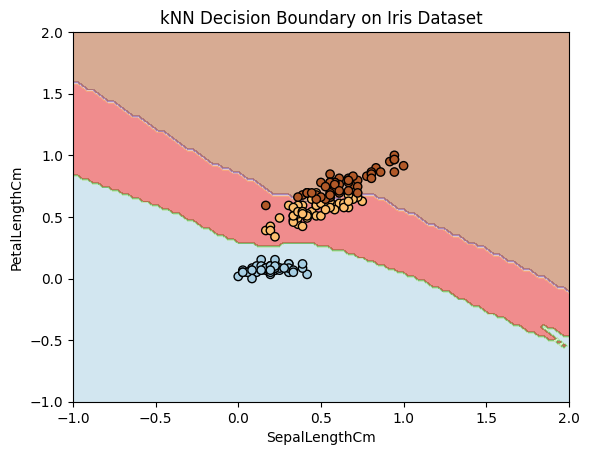

In [31]:
from sklearn.inspection import DecisionBoundaryDisplay
# Plot decision boundary using sklearn's DecisionBoundaryDisplay
Z = X[['SepalLengthCm', 'PetalLengthCm']].values

# Train kNN classifier
knn_viz = KNeighborsClassifier(n_neighbors=best_k)
knn_viz.fit(Z, y)
disp = DecisionBoundaryDisplay.from_estimator(
    knn_viz, Z, response_method='predict', cmap=plt.cm.Paired, alpha=0.5
)

# Overlay data points
plt.scatter(Z[:, 0], Z[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('kNN Decision Boundary on Iris Dataset')
plt.savefig('decisionboundary2.png')
plt.show()

## Decision Boundary by using PCA

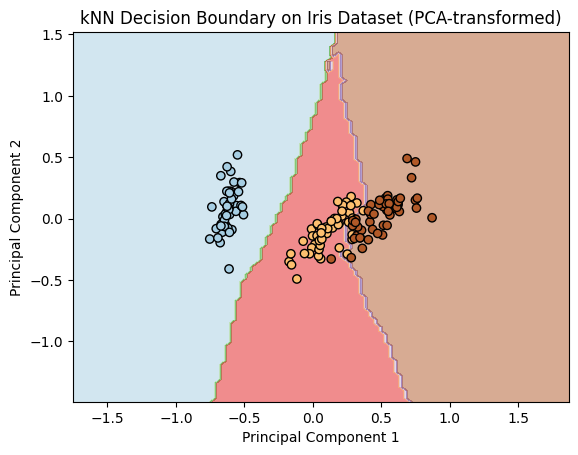

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder


# Select features (all 4 numeric features)
X = df1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

y = df1['Species']

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train kNN on PCA-transformed data
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_pca, y)

# Plot decision boundary in PCA space
disp = DecisionBoundaryDisplay.from_estimator(
    knn, X_pca, response_method='predict', cmap=plt.cm.Paired, alpha=0.5
)

# Overlay training points in PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('kNN Decision Boundary on Iris Dataset (PCA-transformed)')
plt.savefig('PCADecisionBoundary.png')
plt.show()


## 📌 Conclusion

In this analysis, we evaluated the performance of the **k-Nearest Neighbors (k-NN)** classifier on the Iris dataset using validation curves and decision boundary visualizations.

### 🔍 Optimal Hyperparameter

- The best performance was achieved at **k = 7**, selected based on the highest validation F1 Macro Score.

### 📈 Cross-Validation Metrics (5-Fold)

| Metric             | Score (± Std)     |
|--------------------|------------------|
| **Accuracy**        | 0.9600 ± 0.0327  |
| **Precision (macro)** | 0.9623 ± 0.0322  |
| **Recall (macro)**    | 0.9600 ± 0.0327  |
| **F1 Score (macro)**  | 0.9599 ± 0.0327  |

### 🌐 Decision Boundary Insights

- Decision boundary plots using:
  - **Raw feature pairs**
  - **PCA-transformed features**

  ...clearly demonstrate distinct class separability. The boundaries show that the model generalizes well without significant overfitting.

---

✅ **Conclusion**: The k-NN classifier with **k = 7** is an effective and interpretable model for the Iris dataset, delivering strong performance with clear decision regions.
